# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies
import gmaps
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
from citipy import citipy
import time

from config import gkey
gmaps.configure(api_key=gkey)
from config import weather_api_key


## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
coordinates = []
city_list = []
country_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)

# Identify nearest city for each set of coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    country = citipy.nearest_city(coordinates[0], coordinates[1]).country_code
    if city not in city_list:
        city_list.append(city)
        country_list.append(country)



# Print the city count to confirm >500
print(len(city_list))


618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#weather url
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


In [26]:
#define variables
cities = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [52]:
record = 1
lineset = 1

#Start for loop with prints
print('-------------------------------------------------')
print('Finding Data')
print('-------------------------------------------------')

for city in city_list: 
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()

        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']        ['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])


        if record > 50:
            lineset += 1
            record = 1
            cities.append(city)
            time.sleep(2)
        else:
            record += 1
            cities.append(city)
        print(f'Record {record} of Set {lineset}; {city}')
    except (KeyError, IndexError):
        print('--------------ERROR--------------')
        print('No such city, SKIPPING')
        print('---------------------------------')
print('-------------------------------------------------')
print('Complete')
print('-------------------------------------------------')       


5 of Set 2; menongue
Record 6 of Set 2; lakatoro
Record 7 of Set 2; charters towers
Record 8 of Set 2; samarai
Record 9 of Set 2; nata
Record 10 of Set 2; olafsvik
Record 11 of Set 2; hualmay
Record 12 of Set 2; port elizabeth
--------------ERROR--------------
No such city, SKIPPING
---------------------------------
Record 13 of Set 2; punta arenas
Record 14 of Set 2; surok
--------------ERROR--------------
No such city, SKIPPING
---------------------------------
Record 15 of Set 2; ribeira grande
Record 16 of Set 2; bethanien
Record 17 of Set 2; rio claro
Record 18 of Set 2; bubaque
Record 19 of Set 2; bichura
--------------ERROR--------------
No such city, SKIPPING
---------------------------------
Record 20 of Set 2; lebu
Record 21 of Set 2; chokurdakh
Record 22 of Set 2; vaini
Record 23 of Set 2; plettenberg bay
Record 24 of Set 2; ahipara
Record 25 of Set 2; yellowknife
Record 26 of Set 2; rydultowy
Record 27 of Set 2; ponferrada
Record 28 of Set 2; marsa matruh
--------------ERRO

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
#Create dictionary to store data

####COUNTRY????

weather_df = pd.DataFrame({
'City': cities,
'Lat': lat,
'Long': lng,
'Max Temp': max_temp,
'Humidity': humidity,
'Cloudiness': clouds,
'Wind Speed': wind,
#'Country': country,
'Date': date,
})
weather_df.head()


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,palmer,42.16,-72.33,77.00,36,20,11.41,1599259935
1,mys shmidta,62.06,48.62,48.47,95,69,5.26,1599259997
2,bluff,-46.60,168.33,45.00,72,1,11.01,1599259756
3,beringovskiy,63.05,179.32,46.54,69,100,14.99,1599259997
4,norman wells,35.22,-97.44,89.01,52,40,8.05,1599259997


In [30]:
#output data
#weather_df.to_csv(output_data)

In [57]:
weather_df.count()

City          1100
Lat           1100
Long          1100
Max Temp      1100
Humidity      1100
Cloudiness    1100
Wind Speed    1100
Date          1100
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
humidity_sort = weather_df.sort_values(['Humidity'], ascending = False)
humidity_sort.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
795,klaksvik,62.23,-6.59,46.40,100,100,14.99,1599259977
542,bjornevatn,69.67,29.98,55.40,100,75,20.80,1599260161
80,kathu,7.92,98.33,84.99,100,20,1.12,1599259849
979,nishihara,26.18,127.76,78.80,100,75,11.41,1599260130
630,kathu,7.92,98.33,84.99,100,20,1.12,1599259849


In [31]:
#  Get the indices of cities that have humidity over 100%.


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

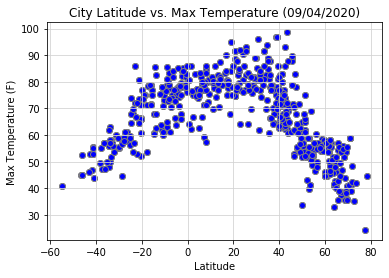

In [63]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="gray", facecolors="blue")
plt.title("City Latitude vs. Max Temperature (09/04/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("lat_v_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

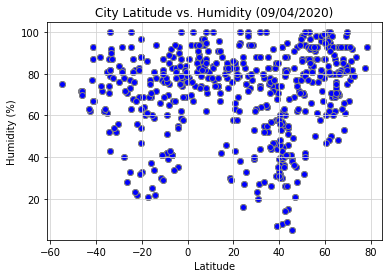

In [64]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="gray", facecolors="blue")
plt.title("City Latitude vs. Humidity (09/04/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("lat_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

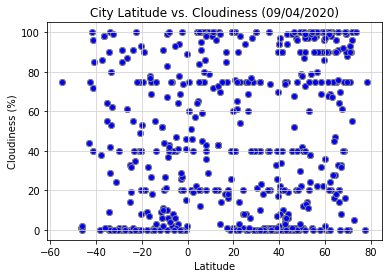

In [65]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors="gray", facecolors="blue")
plt.title("City Latitude vs. Cloudiness (09/04/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("lat_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

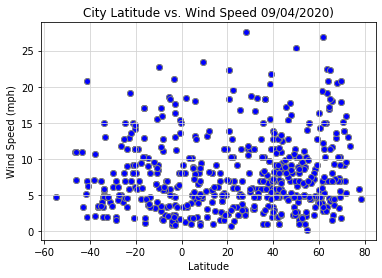

In [66]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolors="gray", facecolors="blue")
plt.title("City Latitude vs. Wind Speed 09/04/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("lat_v_wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


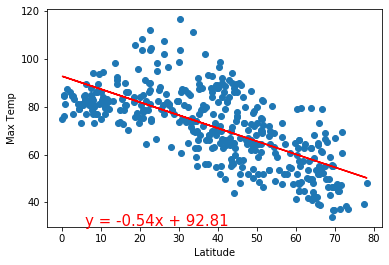

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


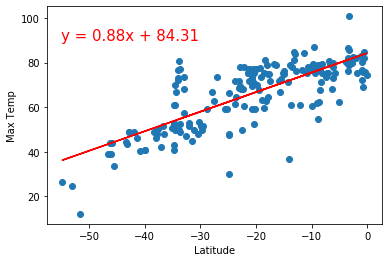

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


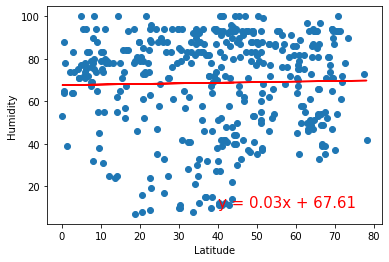

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


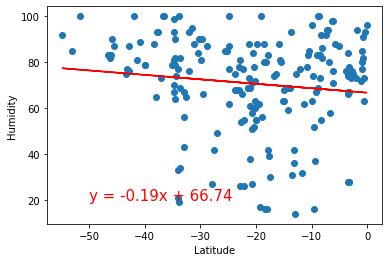

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


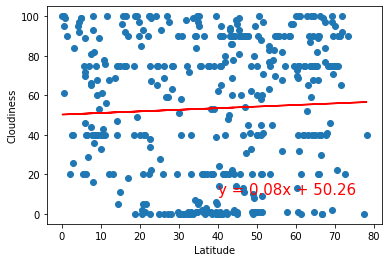

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


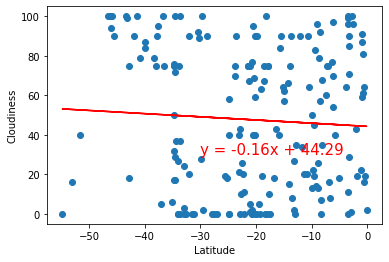

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


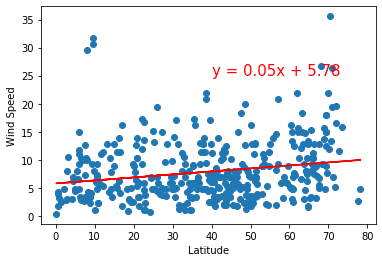

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


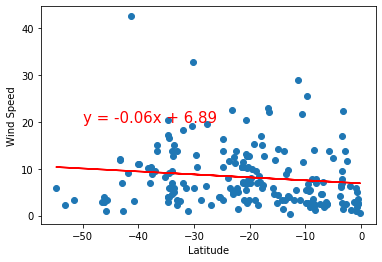